In [16]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt

## Runge-Kutta 4th Order - Definition
### General use

In [17]:
def RungeKutta4(func,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,**kwargs):
    
    n = np.uint64((tf-t0)/h)
    
    yvalues = []
    
    for i in range(n+1):
        if i == 0:
            tk = t0
            yk = y0
            
            yvalues.append(y0)
            continue
        else:
            k1 = h*func(tk,yk,**kwargs)
            k2 = h*func(tk+0.5*h,yk+0.5*k1,**kwargs)
            k3 = h*func(tk+0.5*h,yk+0.5*k2,**kwargs)
            k4 = h*func(tk+h,yk+k3,**kwargs)
            yk = yk + (1/6)*(k1+2*k2+2*k3+k4)
            
            yvalues.append(yk)
            tk = tk + h
        
    yvalues = np.array(yvalues)
    tvalues = np.arange(start=t0,stop=tf+h,step=h)
    
    return tvalues, yvalues

## Runge-Kutta 4th Order - Special Definition
### Use with random generated numbers

In [18]:
def RungeKutta4_RandSamp(func,randsamp,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,**kwargs):
    
    n = np.uint64((tf-t0)/h)
    
    yvalues = []
    
    for i in range(n+1):
        if i == 0:
            tk = t0
            yk = y0
            
            yvalues.append(y0)
            continue
        else:
            k1 = h*func(tk,yk,randsamp[i-1],**kwargs)
            k2 = h*func(tk+0.5*h,yk+0.5*k1,randsamp[i-1],**kwargs)
            k3 = h*func(tk+0.5*h,yk+0.5*k2,randsamp[i-1],**kwargs)
            k4 = h*func(tk+h,yk+k3,randsamp[i-1],**kwargs)
            yk = yk + (1/6)*(k1+2*k2+2*k3+k4)
            
            yvalues.append(yk)
            tk = tk + h
        
    yvalues = np.array(yvalues)
    tvalues = np.arange(start=t0,stop=tf+h,step=h)
    
    return tvalues, yvalues

## Injected Current - Definition of different types

In [19]:
def func_test(tk,yk):
    value = 0.5*(tk-yk)
    return value

# Injected Current: a*sin(wt)

def func_voltage_n1(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    w:float = 1.0):
    
    tau = R*C
    yvalue = (1/tau)*(E + R*a*np.sin(w*tk) - yk)
    return yvalue

# Injected Current: a*step(t-T)

def func_voltage_n2(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    T:float = 0.0):
    
    tau = R*C
    
    if tk-T<0.0:
        yvalue = (1/tau)*(E - yk)
    else:
        yvalue = (1/tau)*(E + R*a - yk)
    
    return yvalue

# Injected Current: random(t) - Normal Distribution with adjustable Mean and SD

def func_voltage_n3(tk:float,yk:float,randitem:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0):
    
    tau = R*C
    yvalue = (1/tau)*(E + R*randitem - yk)
    return yvalue

# Injected Current: a*pulse(t)

def func_voltage_n4(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    T:float = 0.0,
                    d:float = 1.0):
    
    tau = R*C
    
    if tk<T or tk>T+d:
        yvalue = (1/tau)*(E - yk)
    else:
        yvalue = (1/tau)*(E + R*a - yk)
    
    return yvalue

## Demonstrations
### Injected Current: a*sin(wt)

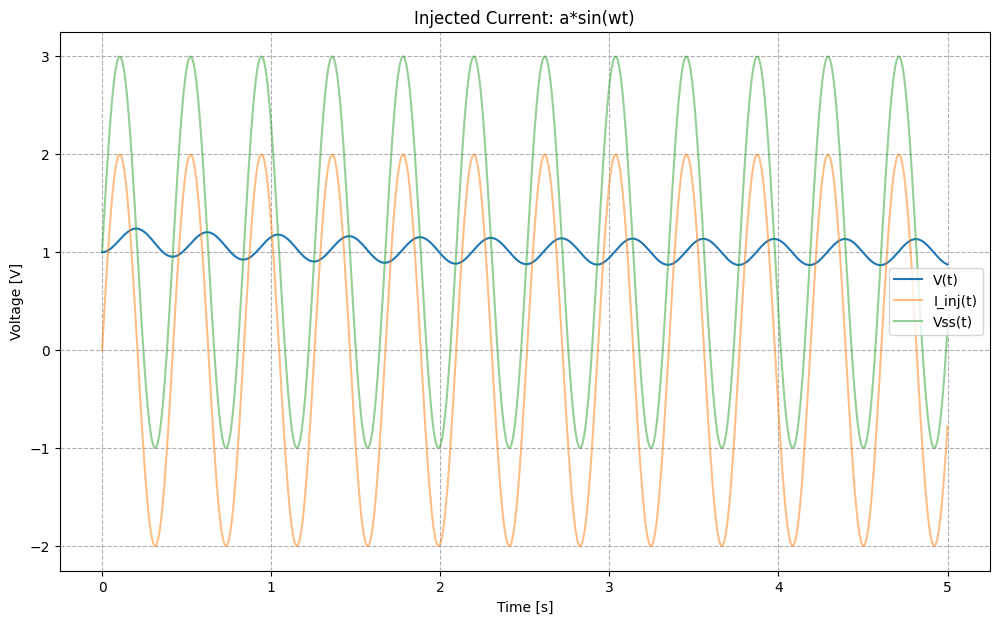

In [20]:
a = 2.0
w = 15.0
R = 1.0
E = 1.0

t1, voltages1 = RungeKutta4(func_voltage_n1,h=0.01,tf=5.0,y0=1.0,a=a,w=w,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t1,voltages1,label='V(t)')
plt.plot(t1,a*np.sin(w*t1),label="I_inj(t)",alpha=0.5)
plt.plot(t1,a*np.sin(w*t1)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*sin(wt)")
plt.legend()
plt.show()

### Injected Current: a*step(t-T)

In [21]:
def step(t, a:float = 1.0, T:float = 0.0):
    
    values = a*np.ones(len(t))
    
    values[t-T < 0.0] = 0.0
    
    return values

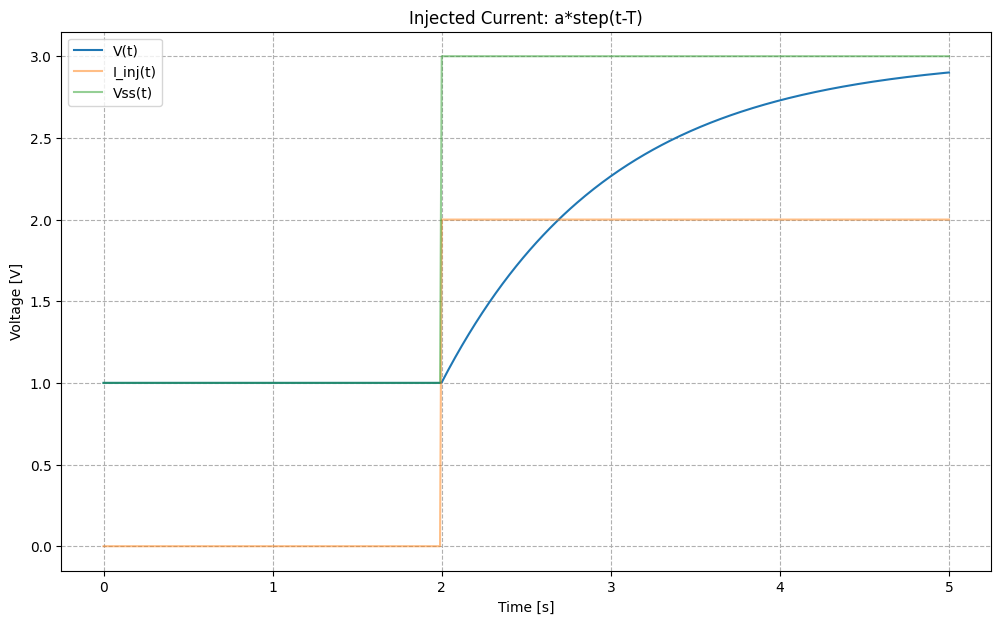

In [22]:
a = 2.0
T = 2.0
R = 1.0
E = 1.0

t2, voltages2 = RungeKutta4(func_voltage_n2,h=0.01,tf=5.0,y0=1.0,a=a,T=T,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t2,voltages2,label='V(t)')
plt.plot(t2,step(t2,a=a,T=T),label="I_inj(t)",alpha=0.5)
plt.plot(t2,R*step(t2,a=a,T=T)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*step(t-T)")
plt.legend()
plt.show()

### Injected Current: random(t) - Normal Distribution with adjustable Mean and SD


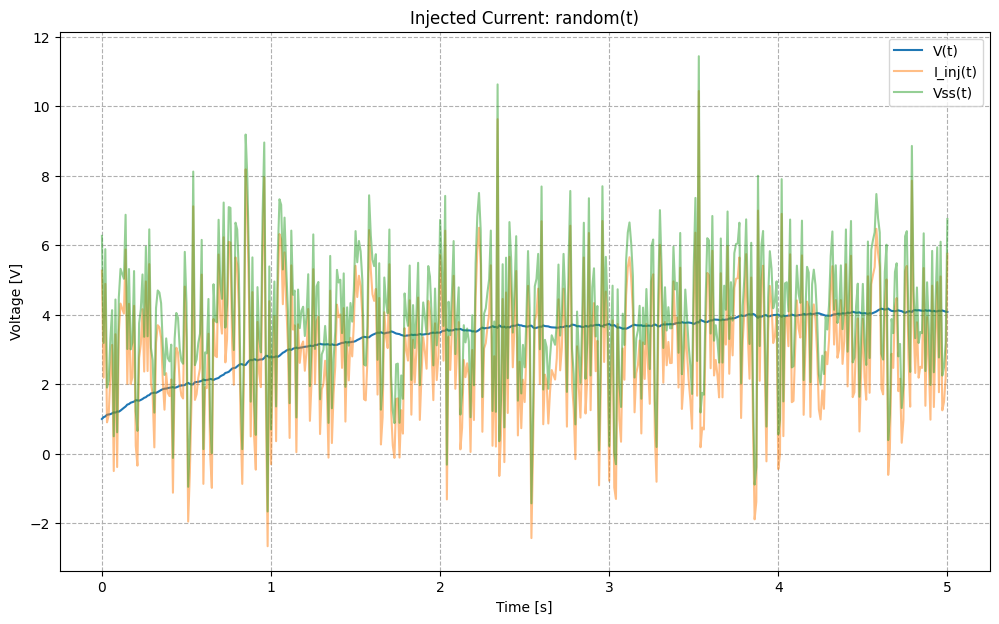

In [23]:
mean = 3.0
sd = 2.0
t0 = 0.0
tf = 5.0
h = 0.01
R = 1.0
E = 1.0

randsample = np.random.normal(loc=mean,scale=sd,size=np.uint32((tf-t0)/h)+1)
t, voltages = RungeKutta4_RandSamp(func_voltage_n3,randsample,h=h,t0=t0,tf=tf,y0=1.0,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t,voltages,label="V(t)")
plt.plot(t,randsample,label="I_inj(t)",alpha=0.5)
plt.plot(t,R*randsample+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title('Injected Current: random(t)')
plt.legend()
plt.show()

### Injected Current: a*pulse(t)

In [24]:
def pulse(t, a:float = 1.0, T:float = 0.0, d:float = 1.0):
    
    values = a*np.ones(len(t))
    
    values[t < T] = 0.0
    values[t > T+d] = 0.0
    
    return values

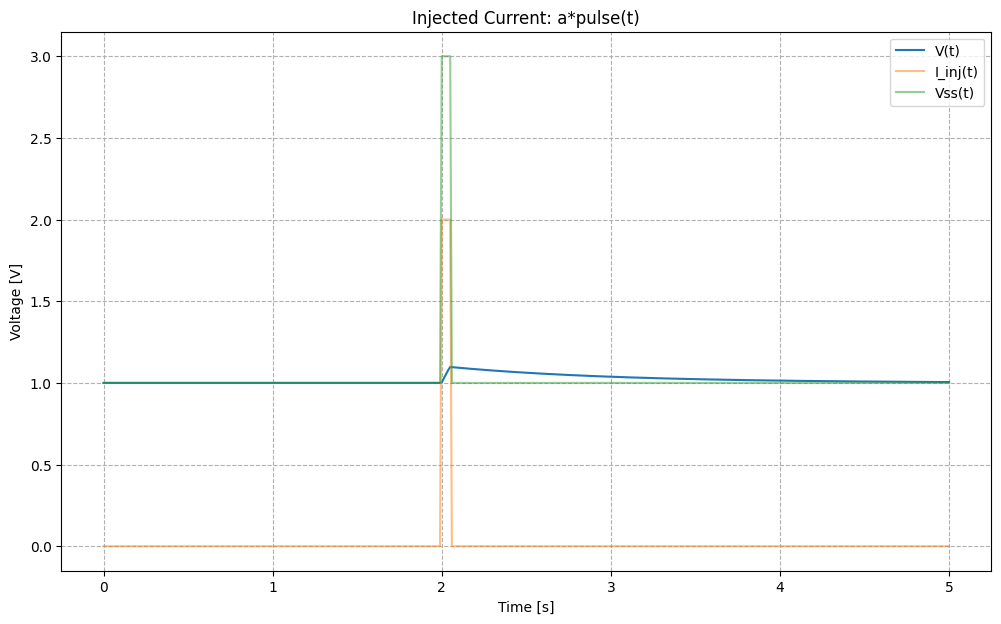

In [25]:
a = 2.0
T = 2.0
d = 0.05
R = 1.0
E = 1.0

t2, voltages2 = RungeKutta4(func_voltage_n4,h=0.01,tf=5.0,y0=1.0,a=a,T=T,d=d,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t2,voltages2,label='V(t)')
plt.plot(t2,pulse(t2,a=a,T=T,d=d),label="I_inj(t)",alpha=0.5)
plt.plot(t2,R*pulse(t2,a=a,T=T,d=d)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*pulse(t)")
plt.legend()
plt.show()